# GRIP: The Sparks Foundation


## Data Science and Business Analytics Internship


### Intern name: Ishaun Sinha


### Prediction using Decision Tree Algorithm


#### Task6: Create a decision tree classifier and visualise it graphically


### Importing the libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import plot_tree
%matplotlib inline

### Reading the dataset


In [2]:
df= pd.read_csv('Iris.csv')

### Exploring the dataset

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.drop(columns='Id',inplace=True)

In [10]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Input data visualisation

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

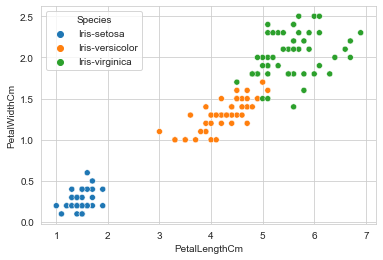

In [11]:
sb.set_style('whitegrid')
sb.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

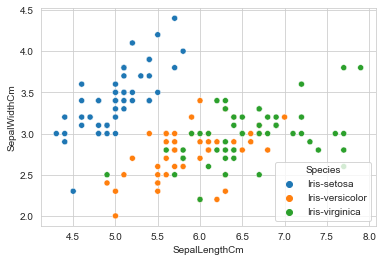

In [12]:
sb.set_style('whitegrid')
sb.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],hue=df['Species'])

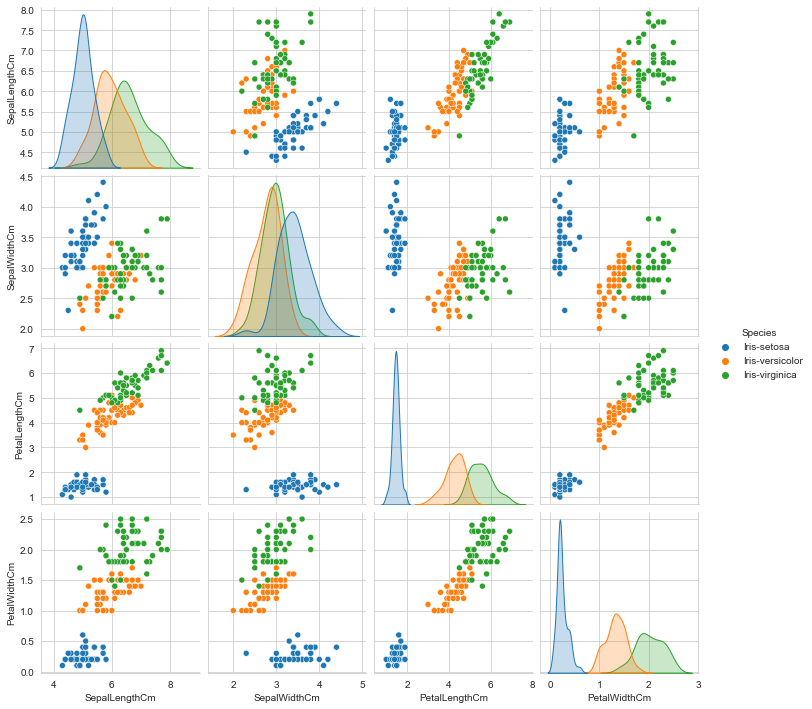

In [13]:
sb.pairplot(df,hue='Species')

### Correlation matrix

<AxesSubplot:>

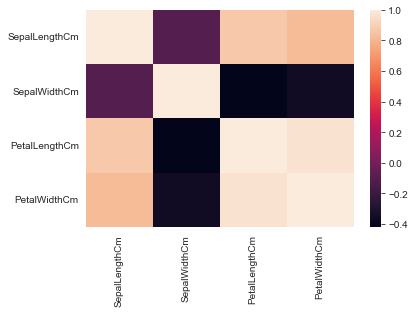

In [14]:
sb.heatmap(df.corr())

### Data preparation and splitting

In [17]:
X= df.iloc[:,0:4].values
encod= LabelEncoder()
df['Species']=encod.fit_transform(df['Species'])
y= df['Species'].values



In [18]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Model fitting and training

In [22]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [23]:
X_train.shape

(120, 4)

In [24]:
X_test.shape

(30, 4)

In [25]:
model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Classification Report and Confusion Matrix

In [27]:
ypred= model.predict(X_test)

In [28]:
classification_report(y_test,ypred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.90      1.00      0.95         9\n           2       1.00      0.91      0.95        11\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.97      0.97        30\nweighted avg       0.97      0.97      0.97        30\n'

In [34]:
sm.accuracy_score(y_test,ypred)

0.9666666666666667

In [35]:
confusion_matrix(y_test,ypred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

### Visualisation of the model

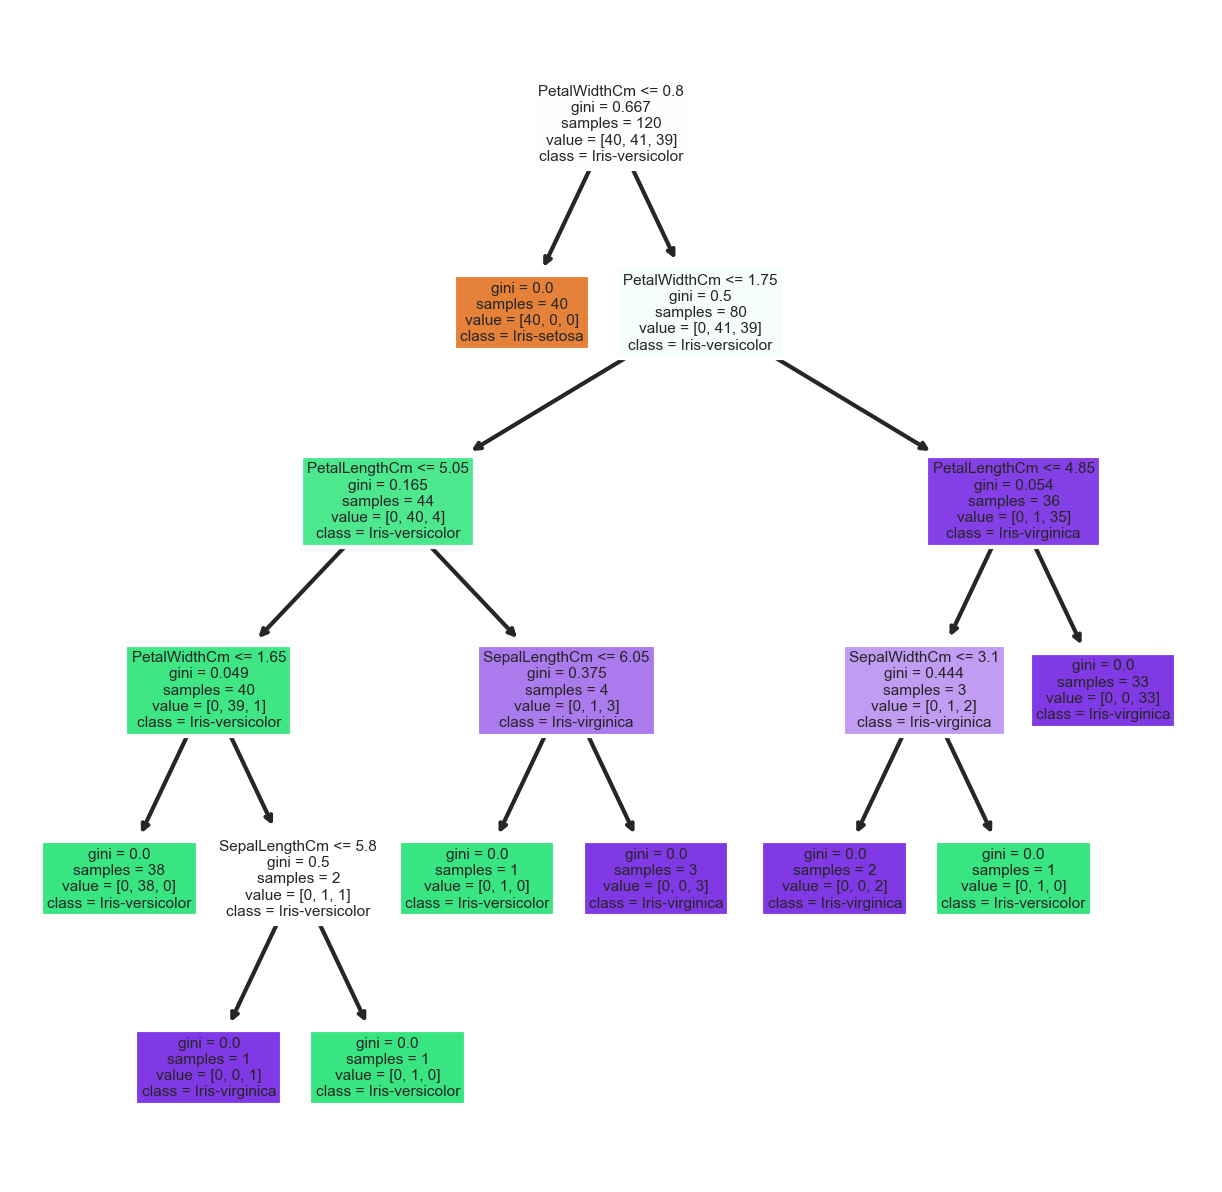

In [38]:
nd= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
lf= ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,axes= plt.subplots(nrows=1, ncols=1,figsize=(5,5),dpi=300)
plot_tree(model,feature_names=nd, class_names=lf,filled=True)
fig.savefig('Decision.png')

### Conclusion: Succesfully created the Decision Tree Classifier and graphically visualised. The accuracy score of the model is 96.6%